In [675]:
import psycopg2
import pandas as pd
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
import unicodedata
import string
import numpy as np

In [676]:
def retrieve_reviews(product):
    conn = psycopg2.connect(dbname='product_reviews', user='postgres', password='', host='localhost')
    cursor = conn.cursor()
    p_no = 0
    r_no = 0
    cursor.execute("select * from reviews where product_name = '{}'".format(product))
    rows = cursor.fetchall()
    df = pd.DataFrame(rows)
    cursor.close()
    conn.close()
    return df

In [677]:
df = retrieve_reviews('LG Electronics 65UJ6300 65-Inch 4K Ultra HD Smart LED TV (2017 Model)')

In [678]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,1,LG Electronics 65UJ6300 65-Inch 4K Ultra HD Sm...,https://www.amazon.com/LG-Electronics-65UJ6300...,1,1,5.0 out of 5 stars,"September 22, 2017",Prime Customer,"TV Great, TruMotion Bad!",Now that I found the TruMotion setting so that...,Verified Purchase Helpful No...
1,2,LG Electronics 65UJ6300 65-Inch 4K Ultra HD Sm...,https://www.amazon.com/LG-Electronics-65UJ6300...,1,2,5.0 out of 5 stars,"December 30, 2017",GMC,Hint: Turn OFF Smart Picture Mode,Hint: Turn off Smart Picture Mode and then tur...,Verified Purchase Helpful No...


In [679]:
columns = ['id','p_name','url','p_no','r_no','r_stars','r_date','r_name','r_title','r_text','r_comments']

In [680]:
df.columns = columns

In [681]:
df.head(2)

,id,p_name,url,p_no,r_no,r_stars,r_date,r_name,r_title,r_text,r_comments
0,1,LG Electronics 65UJ6300 65-Inch 4K Ultra HD Sm...,https://www.amazon.com/LG-Electronics-65UJ6300...,1,1,5.0 out of 5 stars,"September 22, 2017",Prime Customer,"TV Great, TruMotion Bad!",Now that I found the TruMotion setting so that...,Verified Purchase Helpful No...
1,2,LG Electronics 65UJ6300 65-Inch 4K Ultra HD Sm...,https://www.amazon.com/LG-Electronics-65UJ6300...,1,2,5.0 out of 5 stars,"December 30, 2017",GMC,Hint: Turn OFF Smart Picture Mode,Hint: Turn off Smart Picture Mode and then tur...,Verified Purchase Helpful No...


In [682]:
df.groupby(['r_stars']).count()

,id,p_name,url,p_no,r_no,r_date,r_name,r_title,r_text,r_comments
r_stars,,,,,,,,,,
1.0 out of 5 stars,78,78,78,78,78,78,78,78,78,78
2.0 out of 5 stars,25,25,25,25,25,25,25,25,25,25
3.0 out of 5 stars,41,41,41,41,41,41,41,41,41,41
4.0 out of 5 stars,73,73,73,73,73,73,73,73,73,73
5.0 out of 5 stars,257,257,257,257,257,257,257,257,257,257


In [683]:
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii

nltk.download('punkt')
nltk.download('wordnet')
stopwords_ = set(stopwords.words('english'))

punctuation_ = set(string.punctuation)

def filter_tokens(sent):
    return([w for w in sent if not w in stopwords_ and not w in punctuation_])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bhaskarballapragada/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bhaskarballapragada/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [684]:
documents = []
for row in df[df['r_stars'] == '5.0 out of 5 stars'].iterrows():
    documents.append(remove_accents(''.join(row[1]['r_text']).lower().strip()).decode('utf-8'))

In [70]:
len(documents)

257

In [494]:
wordnet = WordNetLemmatizer()
list_of_wordnet_tokens = []

for i, document in enumerate(documents):
    tokens = nltk.word_tokenize(document)
    tokens_filtered = filter_tokens(tokens)
    tokens_wordnet = [''.join(list(map(wordnet.lemmatize, sent))) for sent in tokens_filtered]
    list_of_wordnet_tokens.append(tokens_wordnet)

In [73]:
list_of_wordnet_tokens

[['found',
  'trumotion',
  'setting',
  'could',
  'turn',
  'really',
  'like',
  'tv',
  'took',
  'awhile',
  'find',
  'right',
  'settings',
  'didnt',
  'look',
  'washed',
  'energy',
  'saver',
  'mode',
  'causing',
  'problems',
  'trumotion',
  'setting',
  'makes',
  '24fps',
  'movies',
  'look',
  'like',
  '30fps',
  'home',
  'movies',
  'otherwise',
  'known',
  '``',
  'soap',
  'opera',
  'effect',
  "''",
  'watched',
  'braveheart',
  'awful',
  'spent',
  'movie',
  'looking',
  'settings',
  'trying',
  'find',
  'picture',
  'options'],
 ['hint',
  'turn',
  'smart',
  'picture',
  'mode',
  'turn',
  'energy',
  'saver',
  'smart',
  'picture',
  'mode',
  'access',
  'energy',
  'saver',
  'setting',
  'picture',
  'dull',
  'drab',
  'energy',
  'saver',
  'reduces',
  'backlight',
  'save',
  'energy',
  'cost',
  'poor',
  'picture',
  'quality',
  'making',
  'change',
  'tv',
  'picture',
  'bright',
  'sharp',
  'great',
  'detail'],
 ['needed',
  'upgr

In [75]:
bow_wordnet_set = set(sum(list_of_wordnet_tokens,[]))
from collections import Counter
vocab_c = Counter(bow_wordnet_set)
vocab = {}
for i, k in enumerate (bow_wordnet_set):
    vocab[k] = i

In [77]:
doc_freq = np.zeros(len(vocab))
vec = np.empty(len(list_of_wordnet_tokens)*len(vocab)).reshape(len(list_of_wordnet_tokens),len(vocab))
for i, tokens in enumerate (list_of_wordnet_tokens):
    for token in tokens:
        index = vocab.get(token)
        vec[i, index] = vec[i, index] + 1

doc_freq = np.sum(vec > 0, axis = 0)

In [79]:
vocab

{'tech': 0,
 'walmart': 1,
 'useless': 2,
 'lightweight': 3,
 'expected': 4,
 'wi-fi': 5,
 'hooking': 6,
 'pointed': 7,
 'detect': 8,
 'fabulous': 9,
 'information': 10,
 'due': 11,
 'apps': 12,
 '43': 13,
 'loved': 14,
 'graphics': 15,
 'ps': 16,
 'yes.would': 17,
 'reasonably': 18,
 'engaged': 19,
 'motion': 20,
 'gets': 21,
 'paid': 22,
 'family': 23,
 'led': 24,
 'indicated': 25,
 'seen': 26,
 'refurbished': 27,
 'damage': 28,
 'become': 29,
 'i.': 30,
 '50': 31,
 'may': 32,
 'panel': 33,
 'monsters': 34,
 'menus': 35,
 'clear': 36,
 'soap': 37,
 'week': 38,
 'money': 39,
 'talks': 40,
 'connection': 41,
 'blow': 42,
 'fault': 43,
 'trigger': 44,
 'input': 45,
 'want': 46,
 'second': 47,
 'stream': 48,
 'normal': 49,
 'asian': 50,
 'ways': 51,
 'costs': 52,
 'gave': 53,
 'ez-pezie': 54,
 '32in': 55,
 'certainly': 56,
 'best.bought': 57,
 'smh': 58,
 'detail': 59,
 'spoken': 60,
 'integration/easier': 61,
 'thank': 62,
 '60p': 63,
 'brands': 64,
 '4th': 65,
 'big': 66,
 'lighting': 

In [685]:
df_new = df.copy()
df_new = df_new[df_new['r_stars'].apply(lambda x: x in ['5.0 out of 5 stars','1.0 out of 5 stars'])]

In [686]:
df_new['rating'] = df_new['r_stars'].apply(lambda x: 1 if x == '5.0 out of 5 stars' else 0)

In [687]:
df_new = df_new[['rating','r_name','r_text']]

In [688]:
df_new.head(3)

,rating,r_name,r_text
0,1,Prime Customer,Now that I found the TruMotion setting so that...
1,1,GMC,Hint: Turn off Smart Picture Mode and then tur...
2,1,AncientGhost,Needed an upgrade for my 7yr old HDTV and deci...


In [689]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [690]:
tfidf = TfidfVectorizer(stop_words='english',max_features=20000, ngram_range=(1,1))
X_descr_vectors = tfidf.fit_transform(df_new['r_text'])
feature_names = np.array(tfidf.get_feature_names())

In [691]:
X_descr_vectors.shape, len(feature_names)

((335, 1826), 1826)

Text(0,0.5,'Reconstruction Errror')

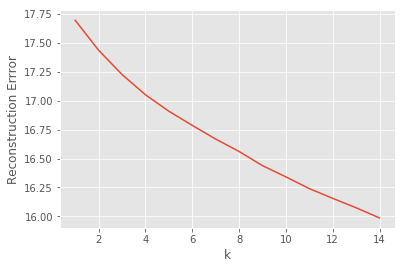

In [692]:
# Compute NMF
from sklearn.decomposition import NMF

def fit_nmf(X, k):
    nmf = NMF(n_components=k)
    nmf.fit(X)
    W = nmf.transform(X);
    H = nmf.components_;
    return nmf.reconstruction_err_

error = [fit_nmf(X_descr_vectors, i) for i in range(1,15)]
plt.plot(range(1,15), error)
plt.xlabel('k')
plt.ylabel('Reconstruction Errror')

In [693]:
# Fit using 3 hidden concepts
nmf = NMF(n_components=15)
nmf.fit(X_descr_vectors)
W = nmf.transform(X_descr_vectors);
H = nmf.components_;
print ('RSS = %.4f' % nmf.reconstruction_err_)

RSS = 15.9071


In [694]:
list(df_new['r_name'].values)

['Prime Customer',
 'GMC',
 'AncientGhost',
 'SJG',
 'Fernando Alvarez',
 'M. Bernson',
 'J M Grappone',
 'ICNI',
 'Jada',
 'Sergey',
 'Pinkie',
 'Zam guy',
 'Zachery Wolfinger',
 'T.P.',
 'Amazon Customer',
 'Agent',
 'josh',
 'OldReno',
 'Texan James',
 'J. Alabi',
 'Rob Russo',
 'NLS',
 'Happy Donis',
 'Jim L.',
 'Michael Andrews',
 'Greg Carlson',
 'F. Childers',
 'Nana',
 'Aksel s',
 'Mr. Bear',
 'Larisa',
 'S. Reigel',
 'Unbox914',
 'pocheting',
 'mhoelzer2988',
 'Rocky Mortensen',
 'Koonel',
 'subway buff',
 'theresa p',
 'Stephen',
 'Haze1092',
 'Alison',
 'craig cordell',
 'Larry basile',
 'Aquapod Bottle Launcher',
 'MR M P CUTLER',
 'Michael B.',
 'Jason Townsend',
 'Jay F',
 'Winnie Litten',
 'Deseree Jean Shuler',
 'Ash',
 'Justin H.',
 'DK',
 'Marilynn Murray',
 'AG',
 'D Novice',
 'Kayla',
 'LoLo',
 'Oldgriz',
 'Dj fidel',
 'bananarock7',
 'The Melba',
 'SIOBLOOM',
 'fph',
 'House',
 'Insain1',
 'Anthony D.',
 'Roger Gifford',
 'Christian Altamura',
 'leslie Peterson',
 

In [695]:
# Make interpretable
words = feature_names
users = list(df_new['r_name'].values)

W, H = (np.around(x,2) for x in (W,H))
W = pd.DataFrame(W,index=users)
H = pd.DataFrame(H,columns=words)


In [696]:
print (W)

                     0     1     2     3     4     5     6     7     8     9   \
Prime Customer     0.00  0.00  0.02  0.00  0.04  0.05  0.02  0.01  0.00  0.00   
GMC                0.02  0.00  0.01  0.00  0.17  0.00  0.01  0.00  0.00  0.00   
AncientGhost       0.02  0.00  0.06  0.00  0.00  0.03  0.01  0.00  0.04  0.00   
SJG                0.00  0.00  0.07  0.09  0.11  0.00  0.16  0.00  0.00  0.05   
Fernando Alvarez   0.09  0.00  0.01  0.13  0.02  0.01  0.01  0.00  0.00  0.00   
M. Bernson         0.01  0.00  0.08  0.04  0.00  0.03  0.00  0.00  0.02  0.01   
J M Grappone       0.06  0.00  0.06  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
ICNI               0.03  0.00  0.02  0.01  0.00  0.01  0.00  0.00  0.00  0.00   
Jada               0.00  0.10  0.05  0.00  0.02  0.05  0.00  0.02  0.00  0.00   
Sergey             0.02  0.00  0.09  0.00  0.00  0.00  0.00  0.05  0.00  0.01   
Pinkie             0.01  0.00  0.06  0.06  0.03  0.08  0.02  0.04  0.00  0.01   
Zam guy            0.03  0.0

In [697]:
df_new[['r_name','rating']]

,r_name,rating
0,Prime Customer,1
1,GMC,1
2,AncientGhost,1
3,SJG,1
5,Fernando Alvarez,1
6,M. Bernson,1
7,J M Grappone,1
9,ICNI,1
10,Jada,1
14,Sergey,1


In [558]:
print(np.sort(H.iloc[0])[-1])

1.71


In [698]:
print(H.iloc[:,[np.argsort(H.iloc[3])[-6]]])

    product
0      0.03
1      0.00
2      0.00
3      0.12
4      0.00
5      0.00
6      0.00
7      0.00
8      0.00
9      0.20
10     0.23
11     0.00
12     0.00
13     0.00
14     0.00


In [560]:
H.columns[np.argsort(H.iloc[3])[-6]]

'took long'

In [449]:
H.columns[828]

Index(['went'], dtype='object')

In [700]:
for i in range(15):
    print (H.columns[np.argsort(H.iloc[i])[-10:-1]])

Index(['issues', 'overall', 'condition', 'far', 'picture', 'working', 'tv',
       'deal', 'value'],
      dtype='object')
Index(['gorgious', 'shipping', 'thanks', 'tv', 'wifi', 'smooth', 'fast',
       'features', 'new'],
      dtype='object')
Index(['best', 'shows', 'bought', 'smart', 'time', '4k', 'right', 'money',
       'awesome'],
      dtype='object')
Index(['value', 'delivered', 'set', 'just', 'product', 'looks', 'cheap',
       'quality', 'far'],
      dtype='object')
Index(['buy', 'energy', 'learning', 'options', 'nice', 'outstanding',
       'beautiful', 'amazing', 'awesome'],
      dtype='object')
Index(['color', 'control', 'having', 'picture', 'clean', 'just', 'nice', 'bar',
       'like'],
      dtype='object')
Index(['brand', 'definitely', 'better', 'vey', 'bad', 'say', 'recommend',
       'highly', 'home'],
      dtype='object')
Index(['beautiful', 'right', 'resolution', 'presents', 'problem', 'super',
       'perfectly', 'shows', 'new'],
      dtype='object')
Index(['s

In [562]:
X_descr_vectors.shape

(335, 5394)

In [563]:
# Compare to SVD
M = X_descr_vectors
from numpy.linalg import svd
r = 3

# Compute SVD
U, sigma, VT = svd(M.todense())

# Make pretty
U, sigma, VT = (np.around(x,2) for x in (U,sigma,VT))
U = pd.DataFrame(U, index=users)
VT = pd.DataFrame(VT, columns=words)

# # Keep top two concepts
U = U.iloc[:,:r]
sigma = sigma[:r]
VT = VT.iloc[:r,:]

print (U)
print (sigma)
print (VT)

                      0     1     2
Prime Customer    -0.00 -0.00  0.00
GMC               -0.00 -0.00  0.00
AncientGhost      -0.00 -0.01  0.02
SJG               -0.00 -0.00  0.00
Fernando Alvarez  -0.00 -0.00  0.00
M. Bernson        -0.00 -0.00 -0.00
J M Grappone      -0.08  0.01 -0.02
ICNI              -0.00 -0.00  0.01
Jada              -0.00 -0.09  0.01
Sergey            -0.00 -0.00  0.00
Pinkie            -0.00 -0.04 -0.01
Zam guy           -0.05  0.01 -0.01
Zachery Wolfinger -0.00 -0.00  0.00
T.P.              -0.00 -0.00  0.00
Amazon Customer   -0.00 -0.00 -0.00
Agent             -0.00 -0.00  0.02
josh              -0.00 -0.00  0.00
OldReno           -0.00 -0.00  0.00
Texan James       -0.00 -0.01  0.01
J. Alabi          -0.00 -0.04  0.04
Rob Russo         -0.01 -0.00 -0.01
NLS               -0.00 -0.00  0.00
Happy Donis       -0.00 -0.00  0.01
Jim L.             0.00  0.00  0.00
Michael Andrews   -0.00 -0.01  0.03
Greg Carlson      -0.00 -0.01  0.07
F. Childers       -0.00 -0.0

In [564]:
from sklearn.cluster import KMeans

In [566]:
km = KMeans(5)

In [567]:
km.fit(X_descr_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [568]:
features = tfidf.get_feature_names()
centroids = km.cluster_centers_
labels = km.labels_
centroid_top_word_index = np.argsort(centroids)[:,-10:-1]

(335,)

In [569]:
words = np.array(features)
centroid_words = []
for row in centroid_top_word_index:
    centroid_words.append(words[row])

In [572]:
df_new.head(3)

,rating,r_name,r_text
0,1,Prime Customer,Now that I found the TruMotion setting so that...
1,1,GMC,Hint: Turn off Smart Picture Mode and then tur...
2,1,AncientGhost,Needed an upgrade for my 7yr old HDTV and deci...


In [574]:
for label, article in zip(labels, df_new.iterrows()):
    print (label, article[1]['rating'], centroid_words[label])

4 1 ['great price' 'netflix amazon' 'great value' 'easy set' 'amazing picture'
 'awesome tv' 'happy purchase' 'picture quality' 'smart tv']
4 1 ['great price' 'netflix amazon' 'great value' 'easy set' 'amazing picture'
 'awesome tv' 'happy purchase' 'picture quality' 'smart tv']
4 1 ['great price' 'netflix amazon' 'great value' 'easy set' 'amazing picture'
 'awesome tv' 'happy purchase' 'picture quality' 'smart tv']
4 1 ['great price' 'netflix amazon' 'great value' 'easy set' 'amazing picture'
 'awesome tv' 'happy purchase' 'picture quality' 'smart tv']
4 1 ['great price' 'netflix amazon' 'great value' 'easy set' 'amazing picture'
 'awesome tv' 'happy purchase' 'picture quality' 'smart tv']
4 1 ['great price' 'netflix amazon' 'great value' 'easy set' 'amazing picture'
 'awesome tv' 'happy purchase' 'picture quality' 'smart tv']
3 1 ['tv extremely' 'extremely clear' 'great value' 'deal great' 'easy use'
 'great picture' 'tv money' 'tv great' 'tv price']
4 1 ['great price' 'netflix amazo

In [601]:
import spacy 
nlp = spacy.load("en")

In [623]:
document = df_new.iloc[0]['r_text']

In [624]:
document = nlp(document)

In [625]:
#define some parameters  
noisy_pos_tags = ["PROP"]
min_token_length = 2

#Function to check if the token is a noise or not  
def isNoise(token):     
    is_noise = False
    if token.pos_ in noisy_pos_tags:
        is_noise = True 
    elif token.is_stop == True:
        is_noise = True
    elif len(token.string) <= min_token_length:
        is_noise = True
    return is_noise 
def cleanup(token, lower = True):
    if lower:
       token = token.lower()
    return token.strip()

# top unigrams used in the reviews 
from collections import Counter
cleaned_list = [cleanup(word.string) for word in document if not isNoise(word)]
Counter(cleaned_list) .most_common(5)
#>> [( u'hotel', 683), (u'room', 652), (u'great', 300),  (u'sheraton', 285), (u'location', 271)]

[('trumotion', 2), ('setting', 2), ('like', 2), ('settings', 2), ('look', 2)]

In [635]:
labels = set([w.label_ for w in document.ents]) 
for label in labels: 
    entities = [cleanup(e.string, lower=False) for e in document.ents if label==e.label_] 
    entities = list(set(entities)) 
    print (label, entities)

GPE ['Picture Options']
CARDINAL ['24fps']
ORG ['Braveheart', 'Soap Opera Effect']


In [630]:
# get all tags
all_tags = {w.pos: w.pos_ for w in document}
#>> {97:  u'SYM', 98: u'VERB', 99: u'X', 101: u'SPACE', 82: u'ADJ', 83: u'ADP', 84: u'ADV', 87: u'CCONJ', 88: u'DET', 89: u'INTJ', 90: u'NOUN', 91: u'NUM', 92: u'PART', 93: u'PRON', 94: u'PROPN', 95: u'PUNCT'}

# all tags of first sentence of our document 
for word in list(document.sents)[0]:  
    print (word, word.tag_)
#>> ( Nice, u'JJ') (place, u'NN') (Better, u'NNP') (than, u'IN') (some, u'DT') (reviews, u'NNS') (give, u'VBP') (it, u'PRP') (creit, u'NN') (for, u'IN') (., u'.')


Now RB
that IN
I PRP
found VBD
the DT
TruMotion NN
setting VBG
so RB
that IN
I PRP
could MD
turn VB
it PRP
off RP
, ,
I PRP
really RB
like VBP
this DT
TV. NN
It PRP
took VBD
awhile RB
to TO
find VB
the DT
right JJ
settings NNS
so IN
it PRP
did VBD
nt RB
look VB
washed VBN
out RP
. .
  SP


In [649]:
# check all adjectives used with a word 
def pos_words (sentence, token, ptag):
    sentences = [sent for sent in sentence.sents if token in sent.string]     
    pwrds = []
    for sent in sentences:
        for word in sent:
            if character in word.string: 
                   pwrds.extend([child.string.strip() for child in word.children
                                                      if child.pos_ == ptag] )
    return Counter(pwrds).most_common(10)

pos_words(document, 'braveheart', "ADJ")

[]

In [650]:
# Generate Noun Phrases 
doc = nlp(u'I love data science on analytics vidhya') 
for np in doc.noun_chunks:
    print (np.text, np.root.dep_, np.root.head.text)
#>> I nsubj love
#   data science dobj love
#   analytics pobj on

I nsubj love
data science dobj love
analytics pobj on


In [660]:
from numpy import dot 
from numpy.linalg import norm 
from spacy.en import English
parser = English()

#Generate word vector of the word - apple  
banana = parser.vocab[u'banana']
print (banana)
#Cosine similarity function 
cosine = lambda v1, v2: dot(v1, v2) / (norm(v1) * norm(v2))
others = list([w for w in parser.vocab if w.has_vector and w.orth_.islower() and w.lower_ != str("banana")])

# sort by similarity score
others.sort(key=lambda w: cosine(w.vector, banana.vector)) 
others.reverse()


print ("top most similar words to apple:")
for word in others[:10]:
    print (word.orth_)
#>> apples iphone f ruit juice cherry lemon banana pie mac orange


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in float_scalars
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:2257: RuntimeWarning: invalid value encountered in sqrt
  ret = sqrt(sqnorm)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in float_scalars
  # Remove the CWD from sys.path while we load stuff.


top most similar words to apple:
nmp
frederich
mclaurin
mroz
19th-century
baladi
chandos
chandon
nmg
nmb


In [661]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

import string
punctuations = string.punctuation

from spacy.en import English
parser = English()

#Custom transformer using spaCy 
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Basic utility function to clean the text 
def clean_text(text):     
    return text.strip().lower()

In [664]:
#Create spacy tokenizer that parses a sentence and generates tokens
#these can also be replaced by word vectors 
def spacy_tokenizer(sentence):
    tokens = parser(sentence)
    tokens = [tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_ for tok in tokens]
    tokens = [tok for tok in tokens if (tok not in stopwords and tok not in punctuations)]     
    return tokens

#create vectorizer object to generate feature vectors, we will use custom spacy’s tokenizer
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1)) 
classifier = LinearSVC()

In [666]:
# Create the  pipeline to clean, tokenize, vectorize, and classify 
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

# Load sample data
train = [('I love this sandwich.', 'pos'),          
         ('this is an amazing place!', 'pos'),
         ('I feel very good about these beers.', 'pos'),
         ('this is my best work.', 'pos'),
         ("what an awesome view", 'pos'),
         ('I do not like this restaurant', 'neg'),
         ('I am tired of this stuff.', 'neg'),
         ("I can't deal with this", 'neg'),
         ('he is my sworn enemy!', 'neg'),          
         ('my boss is horrible.', 'neg')] 
test =   [('the beer was good.', 'pos'),     
         ('I do not enjoy my job', 'neg'),
         ("I ain't feelin dandy today.", 'neg'),
         ("I feel amazing!", 'pos'),
         ('Gary is a good friend of mine.', 'pos'),
         ("I can't believe I'm doing this.", 'neg')]

# Create model and measure accuracy
pipe.fit([x[0] for x in train], [x[1] for x in train]) 
pred_data = pipe.predict([x[0] for x in test]) 
for (sample, pred) in zip(test, pred_data):
    print (sample, pred) 
print ("Accuracy:", accuracy_score([x[1] for x in test], pred_data))

('the beer was good.', 'pos') pos
('I do not enjoy my job', 'neg') neg
("I ain't feelin dandy today.", 'neg') neg
('I feel amazing!', 'pos') pos
('Gary is a good friend of mine.', 'pos') pos
("I can't believe I'm doing this.", 'neg') neg
Accuracy: 1.0
